In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

## **Cleaning Data**

In [ ]:
df.drop(columns=['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], inplace=True)
df.head(1)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df.isna().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Spam = 1  Ham = 0

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

## **Checking Distribution**

Data is Imbalanced

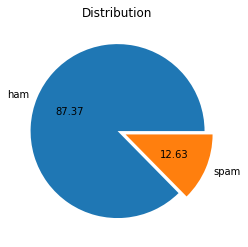

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(df['target'].value_counts(), 
        explode = [0,0.1], 
        labels=['ham', 'spam'],
        autopct="%0.2f")

plt.title('Distribution')
plt.show()

## **Text PreProsseccing**

In [ ]:
import nltk
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def text_processing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
text_processing("going to love this work!")

'go love work'

In [ ]:
df['transformed_text'] = df['text'].apply(text_processing)

In [ ]:
df['transformed_text'][76]

'that cool gentleman treat digniti respect'

## **Most Frequent Words**

Most Frequent Word in Spam SMS

(-0.5, 499.5, 499.5, -0.5)

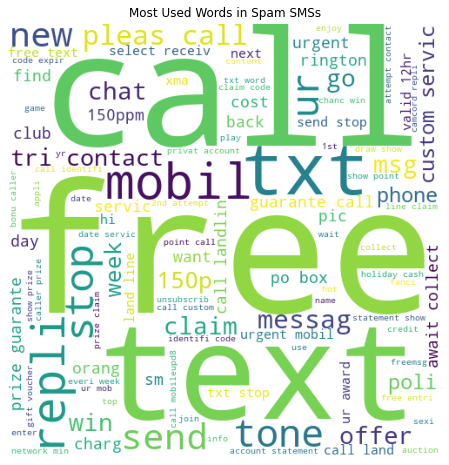

In [ ]:
from wordcloud import WordCloud


wc = WordCloud(width=500,
               height=500,
               min_font_size=10,
               background_color='white')

spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.title('Most Used Words in Spam SMSs')
plt.axis('off')


Most Frequent Words in Ham SMS

(-0.5, 499.5, 499.5, -0.5)

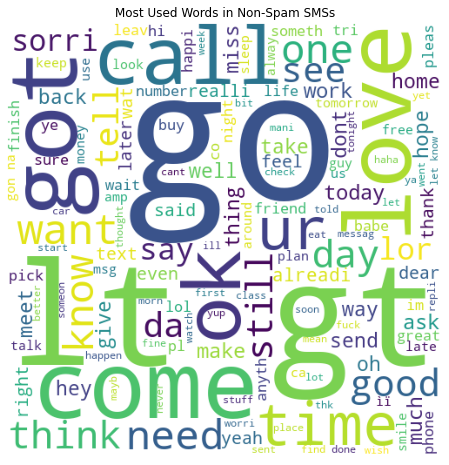

In [ ]:
from wordcloud import WordCloud


wc = WordCloud(width=500,
               height=500,m
               in_font_size=10,
               background_color='white')

spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.title('Most Used Words in Non-Spam SMSs')
plt.axis('off')


## **Text to Numbers**

CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,HashingVectorizer
cv = CountVectorizer(max_features=3000)

In [ ]:
x = cv.fit_transform(df['transformed_text']).toarray()
y = df['target'].values


print(x.shape)
print(y.shape)

(5169, 3000)
(5169,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

## **Model Building & Evaluation**

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import *

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)

    print('Accuracy Score = ',accuracy_score(y_test,y_pred))
    print('precision Score = ',precision_score(y_test,y_pred))
    print('recall Score = ',recall_score(y_test,y_pred))

Support vector Machine

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9303675048355899
precision Score =  0.7578125
recall Score =  0.7028985507246377


KNeighborsClassifier

In [ ]:
train_classifier(knc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9129593810444874
precision Score =  1.0
recall Score =  0.34782608695652173


DecisionTreeClassifier

In [ ]:
train_classifier(dtc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9245647969052224
precision Score =  0.9166666666666666
recall Score =  0.4782608695652174


Logistic Regression

In [ ]:
train_classifier(lrc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9709864603481625
precision Score =  0.9736842105263158
recall Score =  0.8043478260869565


RandomForest

In [ ]:
train_classifier(rfc,x_train,y_train,x_test,y_test)


Accuracy Score =  0.9738878143133463
precision Score =  0.9826086956521739
recall Score =  0.8188405797101449


Naive Baise

GaussianNB

In [ ]:
train_classifier(gnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.874274661508704
precision Score =  0.5176991150442478
recall Score =  0.8478260869565217


MultinomialNB

In [ ]:
train_classifier(mnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.971953578336557
precision Score =  0.8865248226950354
recall Score =  0.9057971014492754


BernoulliNB

In [ ]:
train_classifier(bnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9835589941972921
precision Score =  0.991869918699187
recall Score =  0.8840579710144928


## **Result of Different Models using CountVectorizer**

In [ ]:
result = pd.read_csv('/content/resultd.csv',encoding='ISO-8859-1').sort_values('Accuracy',ascending = False)
result

,Algorithm,Accuracy,Precision,Recall
7,BernoulliNB,98,99,88
3,LogisticRegression,97,97,80
4,RandomForestClassifier,97,98,81
6,MultinomialNB,97,88,90
0,SVC,93,75,70
2,DecisionTreeClassifier,92,91,47
1,KNeighborsClassifier,91,100,34
5,GaussianNB,87,51,84


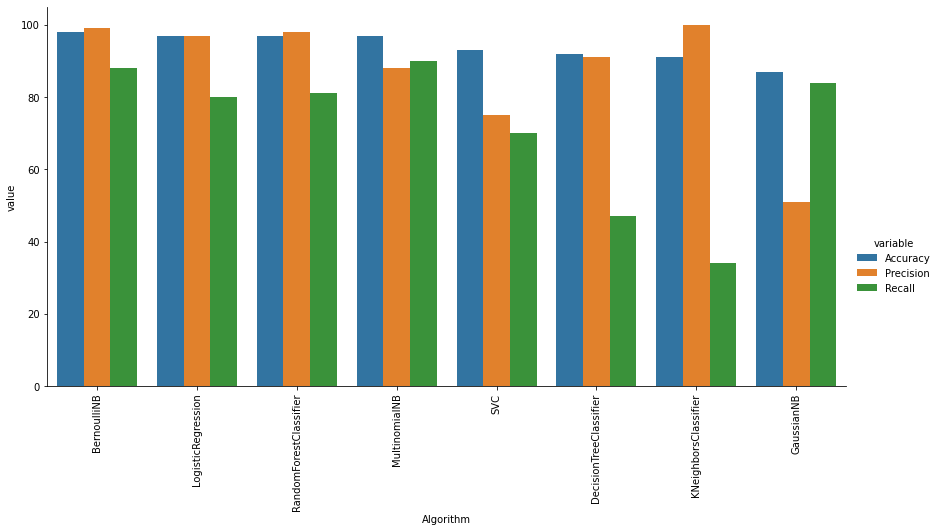

In [ ]:
performance1 = pd.melt(result, id_vars = "Algorithm")

sns.catplot(x = 'Algorithm',
            y='value', 
            hue = 'variable',
            data=performance1, 
            kind='bar',
            height=6,aspect=2)

plt.xticks(rotation='vertical')
plt.show()

## **Implimenting SMOTE to Balance the Data**

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([4516,  653]))

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
x_sm, y_sm = smote.fit_resample(x, y)

np.unique(y_sm, return_counts=True)

(array([0, 1]), array([4516, 4516]))

In [ ]:
xsm_train,xsm_test,ysm_train,ysm_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=42)

## **Model Building on SMOTE**

Support Vector Machine

In [ ]:
train_classifier(svc,xsm_train,ysm_train,xsm_test,ysm_test)


Accuracy Score =  0.853901494189264
precision Score =  0.8311557788944723
recall Score =  0.8959913326110509


KneariestNaigbor

In [ ]:
train_classifier(knc,xsm_train,ysm_train,xsm_test,ysm_test)


Accuracy Score =  0.7288323187603764
precision Score =  0.6538734896943852
recall Score =  0.9967497291440953


DecisionTree

In [ ]:
train_classifier(dtc,xsm_train,ysm_train,xsm_test,ysm_test)


Accuracy Score =  0.7482014388489209
precision Score =  0.903448275862069
recall Score =  0.5677139761646804


Logistic Regression

In [ ]:
train_classifier(lrc,xsm_train,ysm_train,xsm_test,ysm_test)

Accuracy Score =  0.9346983951300498
precision Score =  0.900497512437811
recall Score =  0.980498374864572


Random Forest

In [ ]:
train_classifier(rfc,xsm_train,ysm_train,xsm_test,ysm_test)

Accuracy Score =  0.9369120088544549
precision Score =  0.9016881827209533
recall Score =  0.9837486457204767


Gussion Naive Baise

In [ ]:
train_classifier(gnb,xsm_train,ysm_train,xsm_test,ysm_test)

Accuracy Score =  0.9330381848367459
precision Score =  0.8900778210116731
recall Score =  0.991332611050921


Multinomial Naive Baise

In [ ]:
train_classifier(mnb,xsm_train,ysm_train,xsm_test,ysm_test)

Accuracy Score =  0.8572219147758716
precision Score =  0.9716312056737588
recall Score =  0.742145178764897


Bournoli Naive Baise

In [ ]:
train_classifier(bnb,xsm_train,ysm_train,xsm_test,ysm_test)

Accuracy Score =  0.9739900387382402
precision Score =  0.9699570815450643
recall Score =  0.9794149512459371


## **Result of Different Models using SMOTE**

In [ ]:
sm_result = pd.read_csv('/content/sm_result.csv',encoding='ISO-8859-1')
sm_result.sort_values('Accuracy_Smote',ascending = False)

,Algorithm,Accuracy_Smote,Precision_smote,Recall_smote
7,BernoulliNB,97,96,97.0
3,LogisticRegression,93,90,80.0
4,RandomForestClassifier,93,90,98.0
5,GaussianNB,93,89,99.0
0,SVC,85,83,89.0
6,MultinomialNB,85,97,74.0
2,DecisionTreeClassifier,74,90,56.0
1,KNeighborsClassifier,72,65,99.6


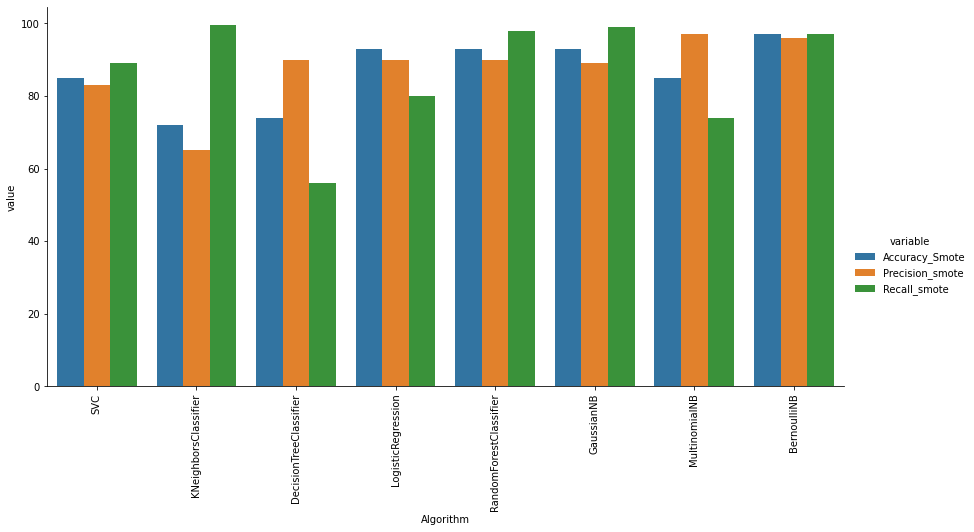

In [ ]:
performance_df1 = pd.melt(sm_result, id_vars = "Algorithm")

sns.catplot(x = 'Algorithm',
            y='value',
            hue = 'variable',
            data=performance_df1, 
            kind='bar',
            height=6,
            aspect=2)

plt.xticks(rotation='vertical')
plt.show()

## **Model Building Using TfidfVectorizer**

In [ ]:
tfidf = TfidfVectorizer(max_features=3000)

x = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

Support Vector machine

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9758220502901354
precision Score =  0.9747899159663865
recall Score =  0.8405797101449275


KnearistNaibor

In [ ]:
train_classifier(knc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9052224371373307
precision Score =  1.0
recall Score =  0.2898550724637681


DecisionTree

In [ ]:
train_classifier(dtc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9274661508704062
precision Score =  0.8118811881188119
recall Score =  0.5942028985507246


Logistic Regression

In [ ]:
train_classifier(lrc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9584139264990329
precision Score =  0.9702970297029703
recall Score =  0.7101449275362319


RandomForest

In [ ]:
train_classifier(rfc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9748549323017408
precision Score =  0.9827586206896551
recall Score =  0.8260869565217391


Gussion Naive Baise

In [ ]:
train_classifier(gnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.8694390715667312
precision Score =  0.5068493150684932
recall Score =  0.8043478260869565


Multinomial Naive Baise

In [ ]:
train_classifier(mnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9709864603481625
precision Score =  1.0
recall Score =  0.782608695652174


Bournoli Naive Baise

In [ ]:
train_classifier(bnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9835589941972921
precision Score =  0.991869918699187
recall Score =  0.8840579710144928


In [ ]:
mask = df['target'] == 1
df[mask]

,target,text,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",six chanc win cash 100 pound txt csh11 send co...
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,remind o2 get pound free call credit detail gr...


## **Prediction**

In [ ]:
def predict(text):
  pre = text_processing(text)
  post = tfidf.transform([text])
  result = bnb.predict(post)[0]

  if result == 0:
    print('Not Spam')
  else:
      print('spam')


In [ ]:
predict('REMINDER FROM O2: To get 2.50 pounds free call')

Not Spam


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)

    print('Accuracy Score = ',accuracy_score(y_test,y_pred))
    print('precision Score = ',precision_score(y_test,y_pred))
    print('recall Score = ',recall_score(y_test,y_pred))

AdaBoostClassifier

In [ ]:
train_classifier(abc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.960348162475822
precision Score =  0.9292035398230089
recall Score =  0.7608695652173914


BaggingClassifier

In [ ]:
train_classifier(bc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9574468085106383
precision Score =  0.8671875
recall Score =  0.8043478260869565


ExtraTreesClassifier

In [ ]:
train_classifier(etc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9748549323017408
precision Score =  0.9745762711864406
recall Score =  0.8333333333333334


GradientBoostingClassifier

In [ ]:
train_classifier(gbdt,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9477756286266924
precision Score =  0.92
recall Score =  0.6666666666666666


XGBClassifier

In [ ]:
train_classifier(xgb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9439071566731141
precision Score =  0.9347826086956522
recall Score =  0.6231884057971014


## **Results of Diffrent Models using TfidfVectorizer**

In [ ]:
tfidf_result = pd.read_csv('/content/tfidf_result.csv',encoding='ISO-8859-1').sort_values('Accuracy',ascending = False)
tfidf_result

,Algorithm,Accuracy,Precision,Recall
7,BernoulliNB,98.0,99.1,88.0
0,SVC,97.5,97.4,84.0
4,RandomForestClassifier,97.4,98.2,82.6
10,ExtraTreesClassifier,97.4,97.4,83.3
6,MultinomialNB,97.0,100.0,78.0
8,AdaBoostClassifier,96.0,92.9,76.0
3,LogisticRegression,95.8,97.0,71.0
9,BaggingClassifier,95.7,86.7,80.4
11,GradientBoostingClassifier,94.7,92.0,66.6
12,XGBClassifier,94.3,93.4,62.3


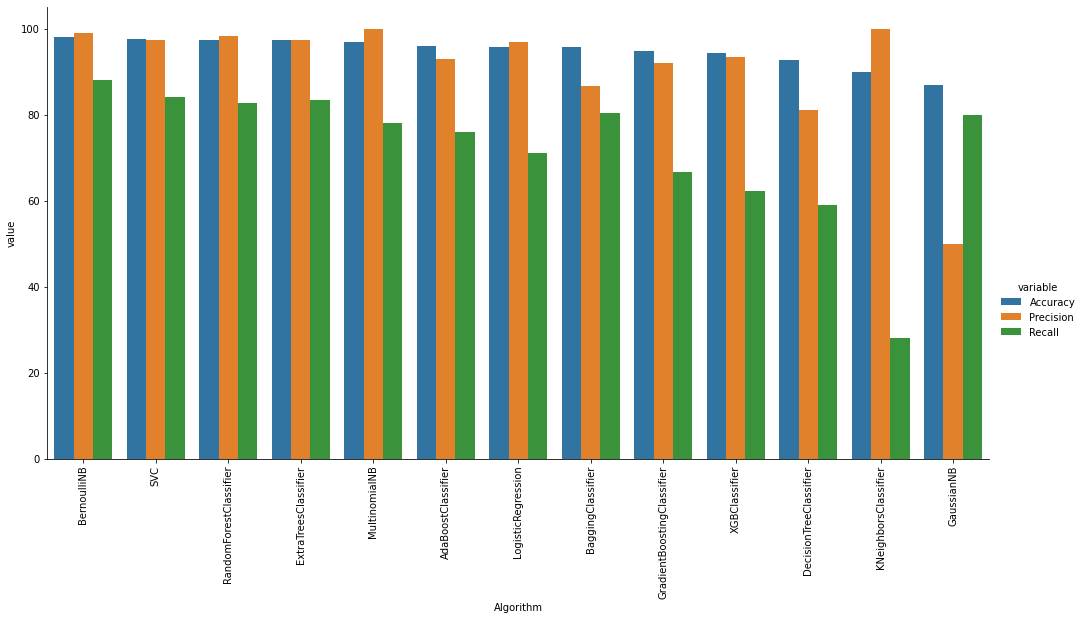

In [ ]:
performance2 = pd.melt(tfidf_result, id_vars = "Algorithm")

sns.catplot(x = 'Algorithm', 
            y='value',
            hue = 'variable',
            data=performance2, 
            kind='bar',
            height=7,
            aspect=2)

plt.xticks(rotation='vertical')
plt.show()

## **Model Building Using HashingVectorizer**

In [ ]:
hs = HashingVectorizer(n_features=3000)
xhs = hs.fit_transform(df['transformed_text']).toarray()
xhs.shape

(5169, 3000)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(xhs,y,test_size=0.2,random_state=42)

## **Model Building**

Support Vector Machine

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.965183752417795
precision Score =  0.9224806201550387
recall Score =  0.8206896551724138


KNN

In [ ]:
train_classifier(knc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9090909090909091
precision Score =  1.0
recall Score =  0.35172413793103446


Decision Tree

In [ ]:
train_classifier(dtc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9294003868471954
precision Score =  0.7857142857142857
recall Score =  0.6827586206896552


Logistic regression

In [ ]:
train_classifier(lrc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9487427466150871
precision Score =  0.8770491803278688
recall Score =  0.7379310344827587


Random Forest

In [ ]:
train_classifier(rfc,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9680851063829787
precision Score =  0.9912280701754386
recall Score =  0.7793103448275862


Gussion Naive Baise

In [ ]:
train_classifier(gnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.7359767891682786
precision Score =  0.29354838709677417
recall Score =  0.6275862068965518


Barnouli Naive Baise

In [ ]:
train_classifier(bnb,x_train,y_train,x_test,y_test)

Accuracy Score =  0.9574468085106383
precision Score =  0.9719626168224299
recall Score =  0.7172413793103448


## **Results of Diffirent Models using HashingVectorizer**

In [ ]:
hashing = pd.read_csv('/content/hashing_result.csv',encoding='ISO-8859-1').sort_values('Accuracy',ascending = False)
hashing 

,Algorithm,Accuracy,Precision,Recall
4,RandomForestClassifier,96.8,99.1,77.9
0,SVC,96.5,92.0,82.0
6,BernoulliNB,95.7,97.1,71.7
3,LogisticRegression,94.8,87.7,73.7
2,DecisionTreeClassifier,92.9,78.5,68.0
1,KNeighborsClassifier,90.9,100.0,35.0
5,GaussianNB,73.0,29.0,62.7
7,MultinomialNB,NaN,NaN,NaN


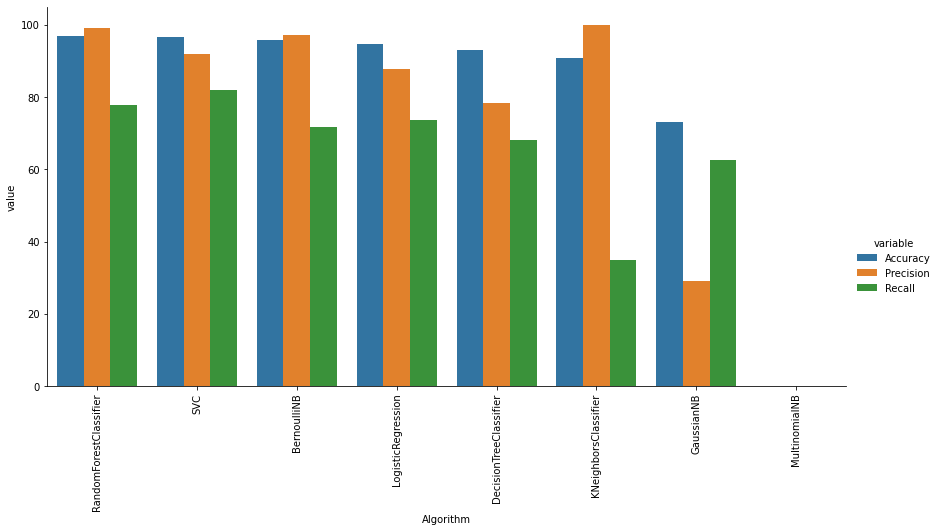

In [ ]:
performance3 = pd.melt(hashing, id_vars = "Algorithm")

sns.catplot(x = 'Algorithm', 
            y='value', 
            hue = 'variable',
            data=performance3, 
            kind='bar',
            height=6, 
            aspect=2)

plt.xticks(rotation='vertical')
plt.show()

## **Applying LSTM**

In [ ]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential 
from keras.preprocessing import sequence
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.layers import Flatten

In [ ]:
x= df['text']
y = df['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [ ]:
max_words=1000
max_len=172
token=Tokenizer(num_words=max_words)
token.fit_on_texts(df['text'])
sequences=token.texts_to_sequences(x_train)
sequences_metrix=sequence.pad_sequences(sequences,padding='post',maxlen=max_len)

In [ ]:
test_sequences = token.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,padding='post',
                                               maxlen=max_len)

In [ ]:
model=Sequential()

# embedding layer
model.add(Embedding(max_words,50,input_length=max_len,trainable=True))

# lstm layer
model.add(LSTM(100,return_sequences=True,dropout=0.5))
model.add(Flatten()) 
# Dense layer
model.add(Dense(200,activation='relu',name='hl1')) 
model.add(Dense(100,activation='relu',name='hl2')) 
model.add(Dense(1,activation='sigmoid',name='ol')) 


model.compile(optimizer='adam', loss='binary_crossentropy',metrics=["accuracy"])

es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1,patience=3)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 172, 50)           50000     
                                                                 
 lstm_2 (LSTM)               (None, 172, 100)          60400     
                                                                 
 flatten (Flatten)           (None, 17200)             0         
                                                                 
 hl1 (Dense)                 (None, 200)               3440200   
                                                                 
 hl2 (Dense)                 (None, 100)               20100     
                                                                 
 ol (Dense)                  (None, 1)                 101       
                                                                 
Total params: 3,570,801
Trainable params: 3,570,801
No

In [ ]:
sequences_metrix.shape,y_train.shape

((4135, 172), (4135,))

In [ ]:
test_sequences_matrix.shape,y_test.shape

((1034, 172), (1034,))

In [ ]:
history=model.fit(sequences_metrix,y_train,batch_size=150,epochs=20,callbacks=[es],validation_split=0.2,verbose=1)

Epoch 1/20
23/23 [==============================] - 19s 704ms/step - loss: 0.3824 - accuracy: 0.8531 - val_loss: 0.2381 - val_accuracy: 0.8936
Epoch 2/20
23/23 [==============================] - 15s 646ms/step - loss: 0.1449 - accuracy: 0.9462 - val_loss: 0.0829 - val_accuracy: 0.9770
Epoch 3/20
23/23 [==============================] - 15s 663ms/step - loss: 0.0511 - accuracy: 0.9873 - val_loss: 0.0682 - val_accuracy: 0.9819
Epoch 4/20
23/23 [==============================] - 15s 636ms/step - loss: 0.0357 - accuracy: 0.9894 - val_loss: 0.0703 - val_accuracy: 0.9819
Epoch 5/20
23/23 [==============================] - 15s 644ms/step - loss: 0.0261 - accuracy: 0.9927 - val_loss: 0.0745 - val_accuracy: 0.9855
Epoch 6/20
23/23 [==============================] - 15s 647ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0780 - val_accuracy: 0.9843
Epoch 6: early stopping


## **Results**

In [ ]:
train_acc=model.evaluate(sequences_metrix,y_train,verbose=1) 
test_acc=model.evaluate(test_sequences_matrix,y_test,verbose=1) 

33/33 [==============================] - 2s 47ms/step - loss: 0.0707 - accuracy: 0.9836


In [ ]:
print("Loss:{:.3f} and Accuracy:{:.3f}".format(test_acc[0],test_acc[1]))

Loss:0.071 and Accuracy:0.984


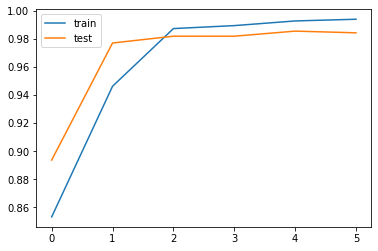

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## **ANN**

In [ ]:
from keras.backend import dropout
NN = Sequential()

NN.add(Dense(128,activation='relu'))
NN.add(Dropout(0.3))
NN.add(Dense(110,activation='relu'))
NN.add(Dropout(0.3))
NN.add(Dense(98,activation='relu'))
NN.add(Dropout(0.3))
NN.add(Dense(50,activation='relu'))
NN.add(Dropout(0.2))
NN.add(Dense(25,activation='relu'))
NN.add(Dense(1,activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1,patience=5)

In [ ]:
NN.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

history = NN.fit(x_train,y_train,epochs=50,validation_split = 0.2)

Epoch 1/50
104/104 [==============================] - 3s 14ms/step - loss: 8.9971e-07 - accuracy: 1.0000 - val_loss: 5.2622e-09 - val_accuracy: 1.0000
Epoch 2/50
104/104 [==============================] - 1s 11ms/step - loss: 1.2345e-07 - accuracy: 1.0000 - val_loss: 1.8557e-11 - val_accuracy: 1.0000
Epoch 3/50
104/104 [==============================] - 1s 11ms/step - loss: 4.6678e-09 - accuracy: 1.0000 - val_loss: 8.3578e-12 - val_accuracy: 1.0000
Epoch 4/50
104/104 [==============================] - 1s 11ms/step - loss: 3.1835e-08 - accuracy: 1.0000 - val_loss: 3.1143e-11 - val_accuracy: 1.0000
Epoch 5/50
104/104 [==============================] - 1s 11ms/step - loss: 1.2647e-08 - accuracy: 1.0000 - val_loss: 2.4867e-11 - val_accuracy: 1.0000
Epoch 6/50
104/104 [==============================] - 1s 12ms/step - loss: 3.0575e-09 - accuracy: 1.0000 - val_loss: 7.1281e-12 - val_accuracy: 1.0000
Epoch 7/50
104/104 [==============================] - 1s 11ms/step - loss: 2.1232e-08 - accura

## **Results**

In [ ]:
score = NN.evaluate(x_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 1.1781092882156372
Test accuracy: 0.9632495045661926


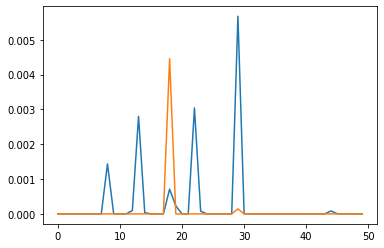

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

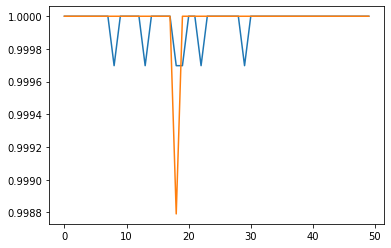

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])